<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/K_Mean_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv("/content/placement_data.csv")
print(df.shape)
df = df.iloc[:,0:2]
df

(100, 3)


,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


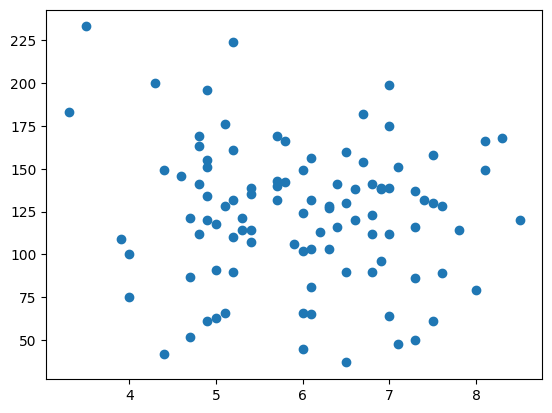

In [30]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

Importing KMeans Cluster from the sklearn

In [31]:
from sklearn.cluster import KMeans

In [33]:
wcss = []
# wcss is within cluster squared sum . Basically it is a eucopidian sum
for i in range(1,15):
  km = KMeans(n_clusters=i)
  km.fit_predict(df)
  wcss.append(km.inertia_)
  # Here the inertia_ is wcss distance

In [34]:
wcss

[158087.8419,
 61483.71714973908,
 28513.651891025635,
 17852.28357153072,
 11584.831362859364,
 6817.846332808858,
 5541.872750915751,
 4099.912857359015,
 3326.6871287114836,
 2676.0764166666677,
 1860.871119047619,
 1398.101393162393,
 1354.3044692529693,
 911.4490456765458]

Text(0, 0.5, 'WCSS / Inertia_')

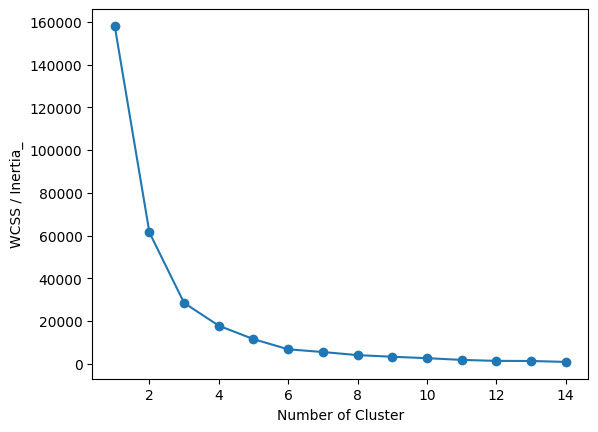

In [36]:
plt.plot(range(1,15),wcss,marker='o')
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS / Inertia_")

Basically this above curve is a elbow curve. It is the curve between WCSS or inertia_ and no. of clusters.

The Elbow point here gives the value of cluster

From the curve I guess the elbow point is 9

In [39]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=9)
y_means = km.fit_predict(X)

In [40]:
y_means

array([4, 4, 4, 0, 0, 8, 0, 1, 6, 1, 8, 0, 0, 4, 3, 2, 7, 2, 3, 0, 4, 6,
       4, 3, 4, 3, 5, 4, 3, 4, 0, 4, 0, 6, 2, 3, 0, 6, 6, 6, 0, 4, 3, 0,
       1, 1, 4, 6, 0, 0, 7, 0, 2, 2, 0, 4, 1, 0, 3, 4, 0, 0, 3, 0, 1, 2,
       3, 4, 1, 4, 0, 0, 4, 1, 6, 2, 6, 8, 3, 3, 5, 4, 8, 0, 2, 2, 0, 0,
       6, 6, 3, 6, 4, 4, 8, 5, 8, 2, 3, 4], dtype=int32)

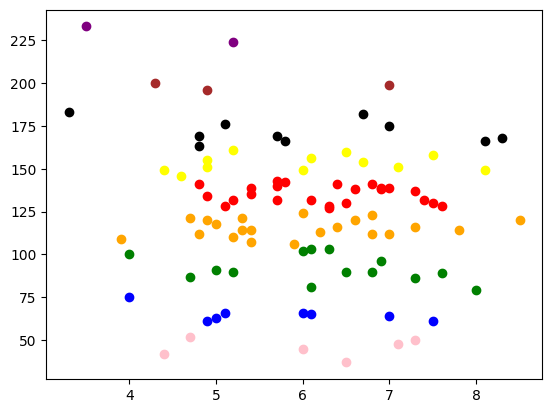

In [43]:
plt.scatter(X[y_means ==0,0],X[y_means == 0,1],color='red')
plt.scatter(X[y_means ==1,0],X[y_means == 1,1],color='blue')
plt.scatter(X[y_means ==2,0],X[y_means == 2,1],color='black')
plt.scatter(X[y_means ==3,0],X[y_means == 3,1],color='green')
plt.scatter(X[y_means ==4,0],X[y_means == 4,1],color='orange')
plt.scatter(X[y_means ==5,0],X[y_means == 5,1],color='brown')
plt.scatter(X[y_means ==6,0],X[y_means == 6,1],color='yellow')
plt.scatter(X[y_means ==7,0],X[y_means == 7,1],color='purple')
plt.scatter(X[y_means ==8,0],X[y_means == 8,1],color='pink')

# K- Mean Clustering on 3-D Data

In [44]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [47]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [48]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

In [49]:
wcss

[11143.784324503365,
 4122.40955760353,
 2552.391733407689,
 593.2516262404542,
 553.6885034068167,
 514.3643547206163,
 467.171770890458,
 456.919577245158,
 402.46705437480506,
 413.1362223708383,
 387.1508290102636,
 345.5724358871083,
 323.4483353405603,
 295.92339377339084,
 294.8766612817771,
 262.3446490360084,
 261.95507414949134,
 264.54945948350826,
 240.4148051455549,
 218.52368918216794]

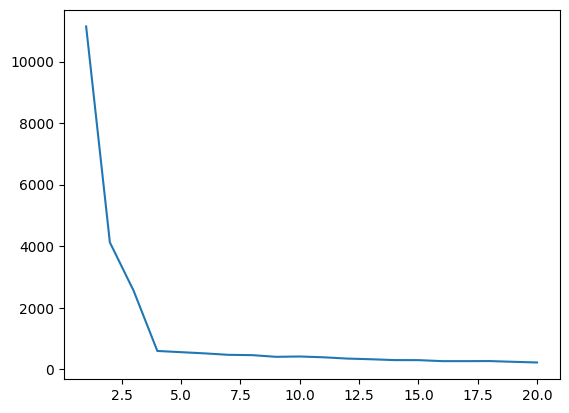

In [50]:
plt.plot(range(1,21),wcss)

In [51]:

km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [52]:

df = pd.DataFrame()
df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [57]:
df

,col1,col2,col3,label
0,4.334245,3.325804,-4.174970,0
1,-3.322467,3.221711,-4.625342,3
2,-6.072969,-4.134592,2.698461,1
3,6.904659,6.111057,-4.340950,0
4,-2.608392,2.950156,-2.234665,3
...,...,...,...,...
195,4.712692,5.680070,-5.319802,0
196,-4.137450,6.458603,-3.351356,3
197,-5.208894,-4.413377,5.838983,1
198,2.619422,-2.779098,5.622849,2


In [54]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()